In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import svm
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [61]:
df_train=pd.read_csv('datasets/train.csv')

In [48]:
df_test=pd.read_csv('datasets/test.csv')

In [29]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
X=df_train.drop("label",axis=1).values
y=df_train["label"].values

In [41]:
X=X/255.0

In [100]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=14)

In [43]:
model=svm.SVC(gamma="auto",kernel='linear')

In [44]:
model.fit(X_train,y_train)

SVC(gamma='auto', kernel='linear')

In [45]:
prediction=model.predict(X_test)

In [46]:
acc=accuracy_score(y_test,prediction)

In [47]:
print(acc)

0.9285714285714286


# **CNN MODEL**

**Reshape**

In [101]:
X_train= X_train.reshape(X_train.shape[0],28,28,1).astype('float32')
X_test= X_test.reshape(X_test.shape[0],28,28,1).astype('float32')
X_train.shape

(33600, 28, 28, 1)

**Label encoding**

One-Hot Encoding

In [102]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)
print(y_train.shape)

(33600, 10)


**Define the model**

In [109]:
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=3,padding="same",activation="relu",input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32,kernel_size=3,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64,kernel_size=3,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(rate=0.2))
model.add(Flatten())

model.add(Dense(units=200,activation='relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(units=10,activation='softmax'))

In [110]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 3, 3, 64)          0         
__________

**Training**

In [111]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [112]:
history=model.fit(X_train,y_train,batch_size=50,epochs=15,verbose=1)

Epoch 1/15
33600/33600 [==============================] - 159s 5ms/sample - loss: 0.3481 - acc: 0.8901s -
Epoch 2/15
33600/33600 [==============================] - 136s 4ms/sample - loss: 0.1073 - acc: 0.9685s - loss: 0.1
Epoch 3/15
33600/33600 [==============================] - 133s 4ms/sample - loss: 0.0715 - acc: 0.9779
Epoch 4/15
33600/33600 [==============================] - 130s 4ms/sample - loss: 0.0606 - acc: 0.9812A: 8s - loss: 0.0608 -  - ET
Epoch 5/15
33600/33600 [==============================] - 140s 4ms/sample - loss: 0.0525 - acc: 0.9842
Epoch 6/15
33600/33600 [==============================] - 133s 4ms/sample - loss: 0.0460 - acc: 0.9863
Epoch 7/15
33600/33600 [==============================] - 104s 3ms/sample - loss: 0.0380 - acc: 0.9877
Epoch 8/15
33600/33600 [==============================] - 99s 3ms/sample - loss: 0.0369 - acc: 0.9885
Epoch 9/15
33600/33600 [==============================] - 94s 3ms/sample - loss: 0.0335 - acc: 0.9890
Epoch 10/15
33600/33600 [======

In [113]:
print(history.history.keys())

dict_keys(['loss', 'acc'])


In [114]:
print(history.history['loss'])

[0.34812363905144766, 0.1072959431268308, 0.07151586183075172, 0.06058045413105685, 0.0525164952778141, 0.045955382576115276, 0.03798367918227, 0.036909065842164204, 0.033459418916468815, 0.02839400815359806, 0.030304851108385697, 0.024037976239745667, 0.026183825179297553, 0.020456470975334793, 0.0213185667640963]


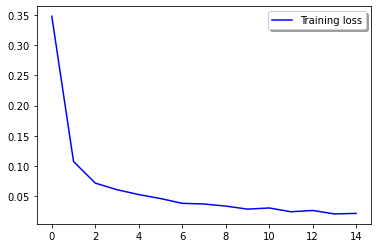

In [120]:
plt.plot(history.history['loss'], color='b', label="Training loss")
plt.legend(loc='best', shadow=True)

In [121]:
predictions = model.evaluate(X_test, y_test)

8400/8400 [==============================] - 2s 256us/sample - loss: 0.0312 - acc: 0.9912


**Test example**

Actual: , 5
Predected:  [[7.9300840e-08 7.9299632e-08 5.8507110e-09 2.1956883e-04 7.0752328e-08
  9.9831200e-01 3.1675023e-07 2.4374160e-07 1.8612796e-07 1.4674591e-03]]


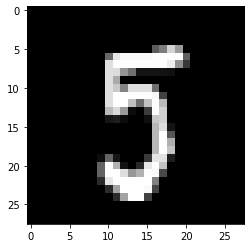

In [127]:
index = 10
plt.imshow(X_test[index].reshape(28,28),cmap='gray')
print("Actual: ,", np.argmax(y_test[index], axis=None, out=None))
print("Predected: ", model.predict(X_test[[index]]))